In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colorbar as mcb
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
from helpers_plot import initPlot, finalizePlot

In [3]:
initPlot()

In [4]:
# Load data

dir="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/GaussianRandomFields/"


# Simulations
B=10000 # Number of bootstrap samples
map3_sim_10=np.load(dir+"map_cubed_npix_4096_fieldsize_10_old.npy")

map3_sim_15=np.load(dir+"map_cubed_npix_4096_fieldsize_15.npy")
map3_sim_20=np.load(dir+"map_cubed_npix_4096_fieldsize_20.npy")

cov_sim_10=np.cov(map3_sim_10[:,1200:3950])
#err_sim_10=get_bootstrap_error_cov(map3_sim_10[:,:1024], B)
cov_sim_15=np.cov(map3_sim_15)
#err_sim_15=get_bootstrap_error_cov(map3_sim_15, B)
cov_sim_20=np.cov(map3_sim_20)
#err_sim_20=get_bootstrap_error_cov(map3_sim_20, B)

Nlos=len(map3_sim_10[0])

cov_sim_10_subsets=[np.cov(map3_sim_10[:,:Nlos//4]), np.cov(map3_sim_10[:,Nlos//4:Nlos//2]), np.cov(map3_sim_10[:,Nlos//2:3*Nlos//4]), np.cov(map3_sim_10[:,3*Nlos//4:Nlos])]
cov_sim_10_subsets=np.array(cov_sim_10_subsets)
cov_err=np.std(cov_sim_10_subsets, axis=0)



# Analytical
T1_inf_10=np.loadtxt(dir+"cov_infinite_term1Numerical_sigma_0.37_n_22209.47_thetaMax_5.73_gpu.dat")
T1_inf_15=np.loadtxt(dir+"cov_infinite_term1Numerical_sigma_0.37_n_22209.47_thetaMax_10.73_gpu.dat")
T1_inf_20=np.loadtxt(dir+"cov_infinite_term1Numerical_sigma_0.37_n_22209.47_thetaMax_15.73_gpu.dat")

T1_10=np.loadtxt(dir+"cov_square_term1Numerical_sigma_0.37_n_22209.47_thetaMax_5.73_gpu.dat")
T1_15=np.loadtxt(dir+"cov_square_term1Numerical_sigma_0.37_n_22209.47_thetaMax_10.73_gpu.dat")
T1_20=np.loadtxt(dir+"cov_square_term1Numerical_sigma_0.37_n_22209.47_thetaMax_15.73_gpu.dat")

T2_10=np.loadtxt(dir+"cov_square_term2Numerical_sigma_0.37_n_22209.47_thetaMax_5.73_gpu.dat")
T2_15=np.loadtxt(dir+"cov_square_term2Numerical_sigma_0.37_n_22209.47_thetaMax_10.73_gpu.dat")
T2_20=np.loadtxt(dir+"cov_square_term2Numerical_sigma_0.37_n_22209.47_thetaMax_15.73_gpu.dat")

In [5]:
# Set Thetas labels
thetas_ind = np.array([[4, 4, 4], [4, 4, 8], [4, 4, 16], [4,4,32], [4, 8, 8], [4, 8, 16], [4,8,32], [4,16,16],
                        [4, 16, 32], [4, 32, 32], [8, 8, 8], [8, 8, 16], [8,8,32],
                         [8, 16, 16], [8,16,32], [8, 32, 32], [16, 16, 16], [16, 16, 32], [16, 32,32], [32, 32,32]])
thetas_labels = []
for thetas in thetas_ind:
    thetas_labels.append(f"{thetas[0]}' {thetas[1]}' {thetas[2]}'")
N = len(thetas_ind)
thetas_ticks = np.arange(0, N)

# General comparison

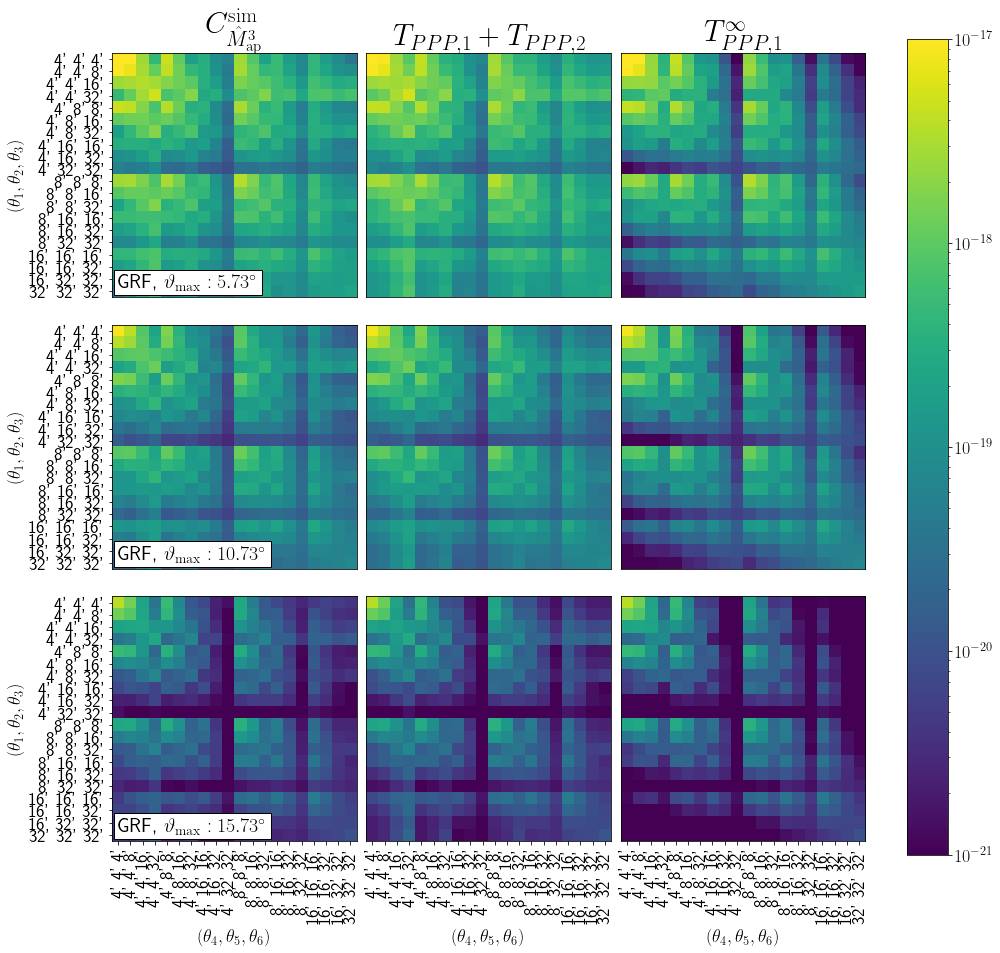

In [6]:
fig, ax=plt.subplots(ncols=3, nrows=3, figsize=(15,15))
fig.subplots_adjust(hspace=0, wspace=0.04)

ax[0,0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
ax[0,0].set_yticks(thetas_ticks)
ax[0,0].set_yticklabels(thetas_labels)
ax[0,0].set_xticks([])

ax[1,0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
ax[1,0].set_yticks(thetas_ticks)
ax[1,0].set_yticklabels(thetas_labels)
ax[1,0].set_xticks([])

ax[2,0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
ax[2,0].set_yticks(thetas_ticks)
ax[2,0].set_yticklabels(thetas_labels)
ax[2,0].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[2,0].set_xticks(thetas_ticks)
ax[2,0].set_xticklabels(thetas_labels, rotation=90)

ax[0,1].set_yticks([])
ax[0,1].set_xticks([])

ax[1,1].set_yticks([])
ax[1,1].set_xticks([])

ax[2,1].set_yticks([])
ax[2,1].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[2,1].set_xticks(thetas_ticks)
ax[2,1].set_xticklabels(thetas_labels, rotation=90)

ax[0,2].set_yticks([])
ax[0,2].set_xticks([])

ax[1,2].set_yticks([])
ax[1,2].set_xticks([])

ax[2,2].set_yticks([])
ax[2,2].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[2,2].set_xticks(thetas_ticks)
ax[2,2].set_xticklabels(thetas_labels, rotation=90)


im=ax[0,0].imshow(cov_sim_10, norm=LogNorm(vmin=1e-22, vmax=1e-17))
im=ax[0,1].imshow(T1_10+T2_10, norm=LogNorm(vmin=1e-22, vmax=1e-17))
im=ax[0,2].imshow(T1_inf_10, norm=LogNorm(vmin=1e-22, vmax=1e-17))
ax[0,0].text(0,N-1, r"GRF, $\vartheta_\mathrm{max}:5.73^\circ$", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)


im=ax[1,0].imshow(cov_sim_15, norm=LogNorm(vmin=1e-22, vmax=1e-17))
im=ax[1,1].imshow(T1_15+T2_15, norm=LogNorm(vmin=1e-22, vmax=1e-17))
im=ax[1,2].imshow(T1_inf_15, norm=LogNorm(vmin=1e-22, vmax=1e-17))
ax[1,0].text(0,N-1, r"GRF, $\vartheta_\mathrm{max}:10.73^\circ$", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)



im=ax[2,0].imshow(cov_sim_20, norm=LogNorm(vmin=1e-21, vmax=1e-17))
im=ax[2,1].imshow(T1_20+T2_20, norm=LogNorm(vmin=1e-21, vmax=1e-17))
im=ax[2,2].imshow(T1_inf_20, norm=LogNorm(vmin=1e-21, vmax=1e-17))
ax[2,0].text(0,N-1, r"GRF, $\vartheta_\mathrm{max}:15.73^\circ$", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)


fig.colorbar(im, ax=ax, fraction=0.05)

ax[0,0].set_title(r"$C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}$", size=30)
ax[0,1].set_title(r"$T_{PPP, 1}+T_{PPP, 2}$", size=30)
ax[0,2].set_title(r"$T^\infty_{PPP, 1}$", size=30)


finalizePlot(ax, outputFn=dir+"/ComparisonGRF_Sim_values.png", showlegend=False, tightlayout=False)

# $T_1$ vs $T_1^\infty$

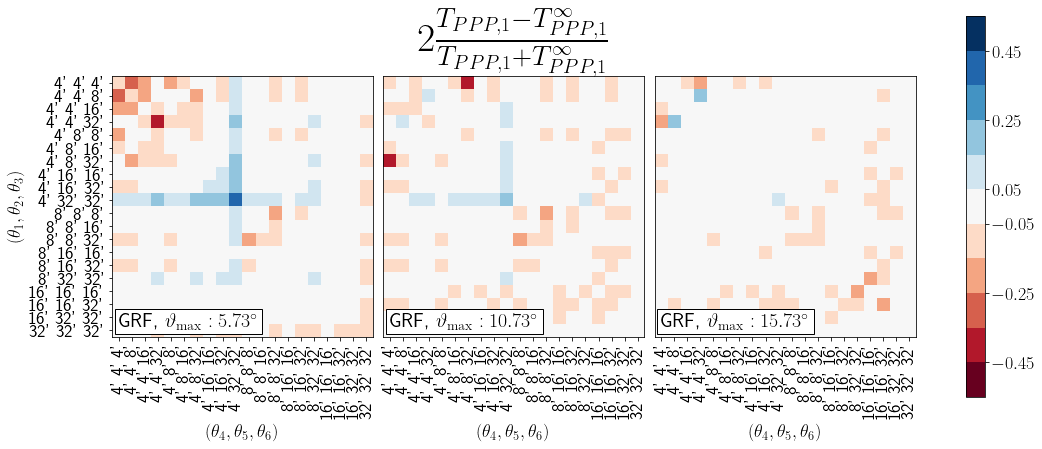

In [7]:
fig, ax=plt.subplots(ncols=3, nrows=1, figsize=(18,7))

cmap=cm.get_cmap('RdBu', 11)
vmin=-0.55
vmax=0.55

plt.subplots_adjust(hspace=0, wspace=0.04)


ax[1].set_title(r"$2\frac{T_{PPP, 1}-T_{PPP, 1}^\infty}{T_{PPP, 1}+T_{PPP, 1}^\infty}$", size=40)

ax[0].text(0,N-1, r"GRF, $\vartheta_\mathrm{max}:5.73^\circ$", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)
ax[1].text(0,N-1, r"GRF, $\vartheta_\mathrm{max}:10.73^\circ$", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)
ax[2].text(0,N-1, r"GRF, $\vartheta_\mathrm{max}:15.73^\circ$", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)


ax[0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
ax[0].set_yticks(thetas_ticks)
ax[0].set_yticklabels(thetas_labels)
ax[0].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[0].set_xticks(thetas_ticks)
ax[0].set_xticklabels(thetas_labels, rotation=90)

ax[1].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[1].set_xticks(thetas_ticks)
ax[1].set_xticklabels(thetas_labels, rotation=90)
ax[1].set_yticks([])

ax[2].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[2].set_xticks(thetas_ticks)
ax[2].set_xticklabels(thetas_labels, rotation=90)
ax[2].set_yticks([])

fracErr_10=2*(T1_10-T1_inf_10)/(T1_10+T1_inf_10)
fracErr_10[fracErr_10>0.4]=0
fracErr_10[fracErr_10<-0.4]=0



fracErr_15=2*(T1_15-T1_inf_15)/(T1_15+T1_inf_15)
fracErr_15[fracErr_15>0.4]=0
fracErr_15[fracErr_15<-0.4]=0

a=(T1_10-T1_inf_10)/(T1_10+T1_inf_10)/((T1_15-T1_inf_15)/(T1_15+T1_inf_15))
fracErr_20=(T1_10-T1_inf_10)/(T1_10+T1_inf_10)/a/a
fracErr_20[fracErr_20>0.4]=0
fracErr_20[fracErr_20<-0.4]=0


im = ax[0].imshow(fracErr_10, vmin=vmin, vmax=vmax, cmap=cmap)
im = ax[1].imshow(fracErr_15, vmin=vmin, vmax=vmax, cmap=cmap)
im = ax[2].imshow(fracErr_20, vmin=vmin, vmax=vmax, cmap=cmap)

#im = ax[2].imshow(2*(T1_20-T1_inf_20)/(T1_20+T1_inf_20), vmin=vmin, vmax=vmax, cmap=cmap)

fig.colorbar(im, ax=ax, ticks=[-0.45, -0.25, -0.05, 0.05, 0.25, 0.45])

finalizePlot(ax, outputFn=dir+"/ComparisonGRF_T1_T1_inf.png", showlegend=False, tightlayout=False)





# Sim vs T1+T2

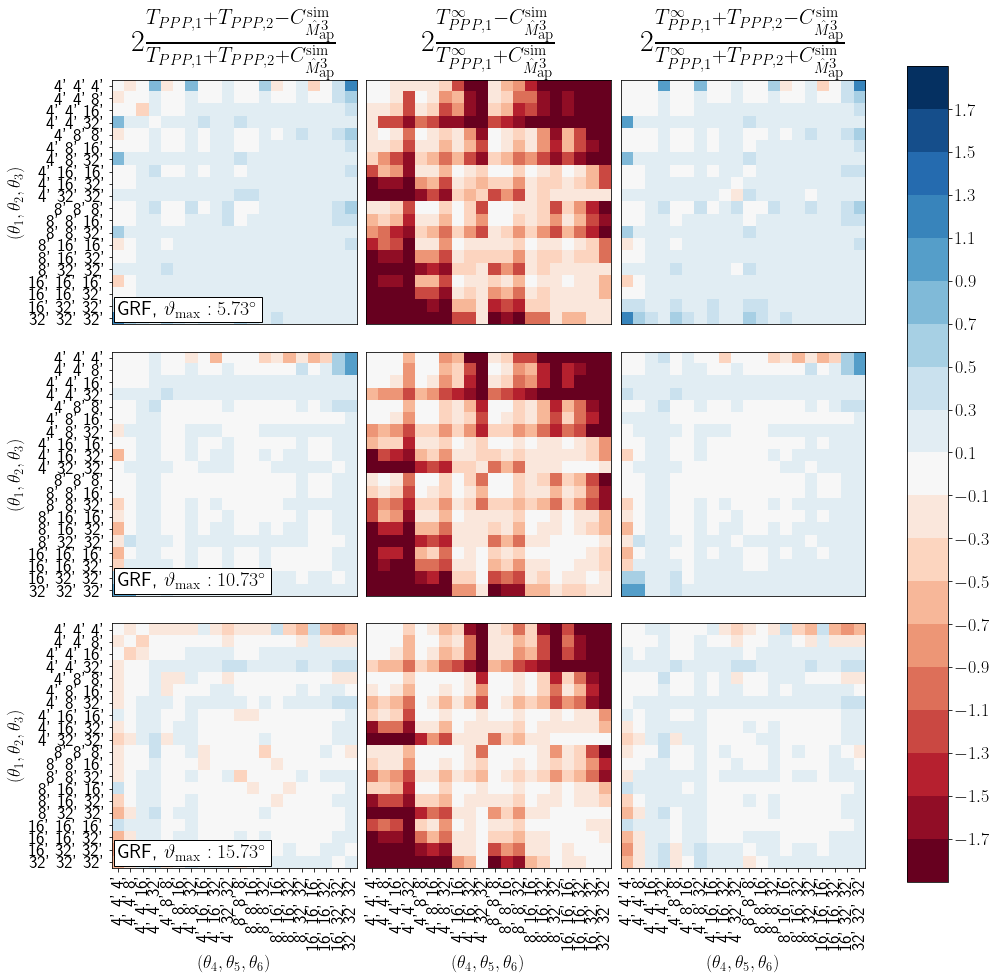

In [8]:
fig, ax=plt.subplots(ncols=3, nrows=3, figsize=(15,15))
plt.subplots_adjust(hspace=0, wspace=0.04)


ax[0,0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
ax[0,0].set_yticks(thetas_ticks)
ax[0,0].set_yticklabels(thetas_labels)
ax[0,0].set_xticks([])

ax[1,0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
ax[1,0].set_yticks(thetas_ticks)
ax[1,0].set_yticklabels(thetas_labels)
ax[1,0].set_xticks([])

ax[2,0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
ax[2,0].set_yticks(thetas_ticks)
ax[2,0].set_yticklabels(thetas_labels)
ax[2,0].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[2,0].set_xticks(thetas_ticks)
ax[2,0].set_xticklabels(thetas_labels, rotation=90)

ax[0,1].set_yticks([])
ax[0,1].set_xticks([])

ax[1,1].set_yticks([])
ax[1,1].set_xticks([])

ax[2,1].set_yticks([])
ax[2,1].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[2,1].set_xticks(thetas_ticks)
ax[2,1].set_xticklabels(thetas_labels, rotation=90)

ax[0,2].set_yticks([])
ax[0,2].set_xticks([])

ax[1,2].set_yticks([])
ax[1,2].set_xticks([])

ax[2,2].set_yticks([])
ax[2,2].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[2,2].set_xticks(thetas_ticks)
ax[2,2].set_xticklabels(thetas_labels, rotation=90)

ax[0,0].text(0,N-1, r"GRF, $\vartheta_\mathrm{max}:5.73^\circ$", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)
ax[1,0].text(0,N-1, r"GRF, $\vartheta_\mathrm{max}:10.73^\circ$", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)
ax[2,0].text(0,N-1, r"GRF, $\vartheta_\mathrm{max}:15.73^\circ$", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)


cmap=cm.get_cmap('RdBu', 19)
vmin=-1.9
vmax=1.9

im=ax[0,0].imshow(2*(T1_10+T2_10-cov_sim_10)/(T1_10+T2_10+cov_sim_10), cmap=cmap, vmin=vmin, vmax=vmax)
im=ax[0,1].imshow(2*(T1_inf_10-cov_sim_10)/(T1_inf_10+cov_sim_10), cmap=cmap, vmin=vmin, vmax=vmax)
im=ax[0,2].imshow(2*(T1_inf_10+T2_10-cov_sim_10)/(T1_inf_10+T2_10+cov_sim_10), cmap=cmap, vmin=vmin, vmax=vmax)

im=ax[1,0].imshow(2*(T1_15+T2_15-cov_sim_15)/(T1_15+T2_15+cov_sim_15), cmap=cmap, vmin=vmin, vmax=vmax)
im=ax[1,1].imshow(2*(T1_inf_15-cov_sim_15)/(T1_inf_15+cov_sim_15), cmap=cmap, vmin=vmin, vmax=vmax)
im=ax[1,2].imshow(2*(T1_inf_15+T2_15-cov_sim_15)/(T1_inf_15+T2_15+cov_sim_15), cmap=cmap, vmin=vmin, vmax=vmax)

im=ax[2,0].imshow(2*(T1_20+T2_20-cov_sim_20)/(T1_20+T2_20+cov_sim_20), cmap=cmap, vmin=vmin, vmax=vmax)
im=ax[2,1].imshow(2*(T1_inf_20-cov_sim_20)/(T1_inf_20+cov_sim_20), cmap=cmap, vmin=vmin, vmax=vmax)
im=ax[2,2].imshow(2*(T1_inf_20+T2_20-cov_sim_20)/(T1_inf_20+T2_20+cov_sim_20), cmap=cmap, vmin=vmin, vmax=vmax)

ax[0,0].set_title(r"$2\frac{T_{PPP, 1}+T_{PPP, 2}-C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}}{T_{PPP, 1}+T_{PPP, 2}+C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}}$", size=30)
ax[0,1].set_title(r"$2\frac{T^\infty_{PPP, 1}-C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}}{T^\infty_{PPP, 1}+C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}}$", size=30)
ax[0,2].set_title(r"$2\frac{T^\infty_{PPP, 1}+T_{PPP, 2}-C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}}{T^\infty_{PPP, 1}+T_{PPP, 2}+C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}}$", size=30)

fig.colorbar(im, ax=ax, ticks=[-1.7, -1.5, -1.3, -1.1, -0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7], fraction=0.05)

finalizePlot(ax, outputFn=dir+"/ComparisonGRF_Sim_FracErrors.png", showlegend=False, tightlayout=False)


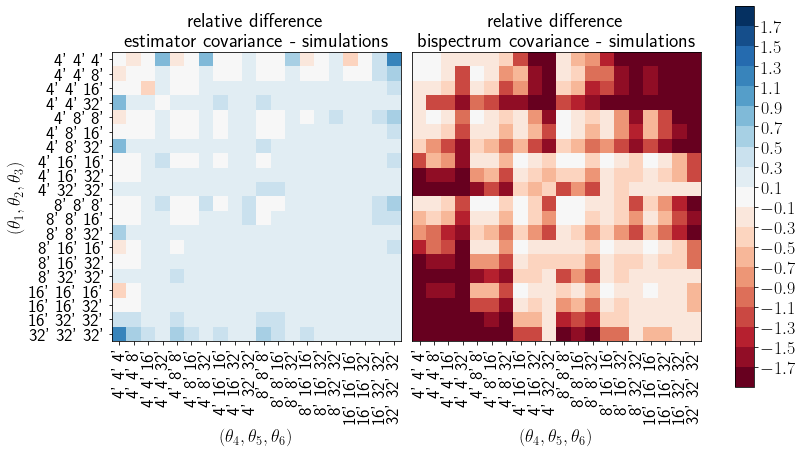

In [13]:
fig, ax=plt.subplots(ncols=2, nrows=1, figsize=(12,7))
plt.subplots_adjust(hspace=0, wspace=0.04)


ax[0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
ax[0].set_yticks(thetas_ticks)
ax[0].set_yticklabels(thetas_labels)
ax[0].set_xticks([])

# ax[1,0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
# ax[1,0].set_yticks(thetas_ticks)
# ax[1,0].set_yticklabels(thetas_labels)
# ax[1,0].set_xticks([])

# ax[2,0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
# ax[2,0].set_yticks(thetas_ticks)
# ax[2,0].set_yticklabels(thetas_labels)
ax[0].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[0].set_xticks(thetas_ticks)
ax[0].set_xticklabels(thetas_labels, rotation=90)

ax[1].set_yticks([])

ax[1].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[1].set_xticks(thetas_ticks)
ax[1].set_xticklabels(thetas_labels, rotation=90)

# ax[0,2].set_yticks([])
# ax[0,2].set_xticks([])

# ax[1,2].set_yticks([])
# ax[1,2].set_xticks([])

# ax[2,2].set_yticks([])
# ax[2,2].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
# ax[2,2].set_xticks(thetas_ticks)
# ax[2,2].set_xticklabels(thetas_labels, rotation=90)

#ax[0].text(0,N-1, r"GRF, $\vartheta_\mathrm{max}:5.73^\circ$", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)
#ax[1,0].text(0,N-1, r"GRF, $\vartheta_\mathrm{max}:10.73^\circ$", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)
#ax[2,0].text(0,N-1, r"GRF, $\vartheta_\mathrm{max}:15.73^\circ$", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)


cmap=cm.get_cmap('RdBu', 19)
vmin=-1.9
vmax=1.9

im=ax[0].imshow(2*(T1_10+T2_10-cov_sim_10)/(T1_10+T2_10+cov_sim_10), cmap=cmap, vmin=vmin, vmax=vmax)
im=ax[1].imshow(2*(T1_inf_10-cov_sim_10)/(T1_inf_10+cov_sim_10), cmap=cmap, vmin=vmin, vmax=vmax)
# im=ax[0,2].imshow(2*(T1_inf_10+T2_10-cov_sim_10)/(T1_inf_10+T2_10+cov_sim_10), cmap=cmap, vmin=vmin, vmax=vmax)

# im=ax[1,0].imshow(2*(T1_15+T2_15-cov_sim_15)/(T1_15+T2_15+cov_sim_15), cmap=cmap, vmin=vmin, vmax=vmax)
# im=ax[1,1].imshow(2*(T1_inf_15-cov_sim_15)/(T1_inf_15+cov_sim_15), cmap=cmap, vmin=vmin, vmax=vmax)
# im=ax[1,2].imshow(2*(T1_inf_15+T2_15-cov_sim_15)/(T1_inf_15+T2_15+cov_sim_15), cmap=cmap, vmin=vmin, vmax=vmax)

# im=ax[2,0].imshow(2*(T1_20+T2_20-cov_sim_20)/(T1_20+T2_20+cov_sim_20), cmap=cmap, vmin=vmin, vmax=vmax)
# im=ax[2,1].imshow(2*(T1_inf_20-cov_sim_20)/(T1_inf_20+cov_sim_20), cmap=cmap, vmin=vmin, vmax=vmax)
# im=ax[2,2].imshow(2*(T1_inf_20+T2_20-cov_sim_20)/(T1_inf_20+T2_20+cov_sim_20), cmap=cmap, vmin=vmin, vmax=vmax)

ax[0].set_title("relative difference \n estimator covariance - simulations", size=20)
ax[1].set_title("relative difference \n bispectrum covariance - simulations", size=20)
#ax[0,2].set_title(r"$2\frac{T^\infty_{PPP, 1}+T_{PPP, 2}-C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}}{T^\infty_{PPP, 1}+T_{PPP, 2}+C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}}$", size=30)

fig.colorbar(im, ax=ax, ticks=[-1.7, -1.5, -1.3, -1.1, -0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7], fraction=0.07)

finalizePlot(ax, outputFn=dir+"/ComparisonGRF_forSven.png", showlegend=False, tightlayout=False)


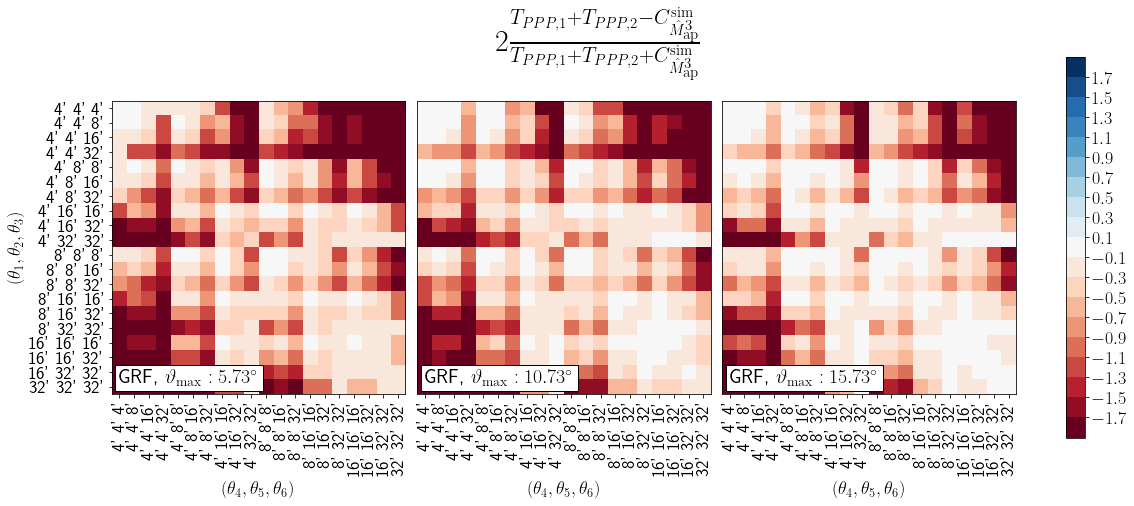

In [ ]:
fig, ax=plt.subplots(ncols=3, figsize=(18,7))
plt.subplots_adjust(hspace=0, wspace=0.04)


ax[0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
ax[0].set_yticks(thetas_ticks)
ax[0].set_yticklabels(thetas_labels)
ax[0].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[0].set_xticks(thetas_ticks)
ax[0].set_xticklabels(thetas_labels, rotation=90)


ax[1].set_yticks([])
ax[1].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[1].set_xticks(thetas_ticks)
ax[1].set_xticklabels(thetas_labels, rotation=90)

ax[2].set_yticks([])
ax[2].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[2].set_xticks(thetas_ticks)
ax[2].set_xticklabels(thetas_labels, rotation=90)


ax[0].text(0,N-1, r"GRF, $\vartheta_\mathrm{max}:5.73^\circ$", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)
ax[1].text(0,N-1, r"GRF, $\vartheta_\mathrm{max}:10.73^\circ$", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)
ax[2].text(0,N-1, r"GRF, $\vartheta_\mathrm{max}:15.73^\circ$", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)


cmap=cm.get_cmap('RdBu', 19)
vmin=-1.9
vmax=1.9

im=ax[0].imshow(2*(T1_inf_10-cov_sim_10)/(T1_inf_10+cov_sim_10), cmap=cmap, vmin=vmin, vmax=vmax)

im=ax[1].imshow(2*(T1_inf_15-cov_sim_15)/(T1_inf_15+cov_sim_15), cmap=cmap, vmin=vmin, vmax=vmax)

im=ax[2].imshow(2*(T1_inf_20-cov_sim_20)/(T1_inf_20+cov_sim_20), cmap=cmap, vmin=vmin, vmax=vmax)

plt.suptitle(r"$2\frac{T_{PPP, 1}+T_{PPP, 2}-C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}}{T_{PPP, 1}+T_{PPP, 2}+C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}}$", size=30)

fig.colorbar(im, ax=ax, ticks=[-1.7, -1.5, -1.3, -1.1, -0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7], fraction=0.05)

finalizePlot(ax, outputFn=dir+"/ComparisonGRF_Sim_FracErrors_onlyLargeFieldApprox.png", showlegend=False, tightlayout=False)


# Rescaling

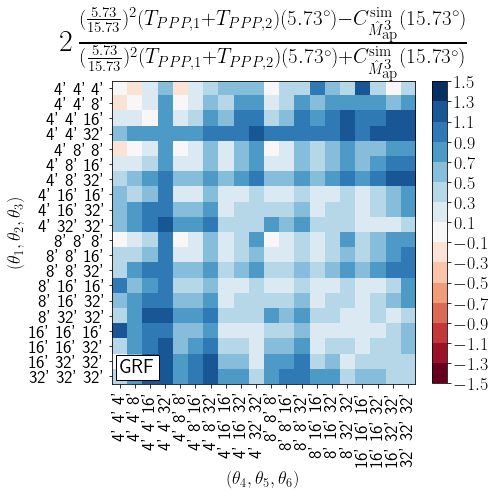

In [ ]:
fig, ax=plt.subplots(ncols=1, nrows=1, figsize=(7,7))

rescale_factor=5.73*5.73/15.73/15.73



cmap=cm.get_cmap('RdBu', 15)
vmin=-1.5
vmax=1.5

im=ax.imshow(2*((T1_10+T2_10)*rescale_factor-cov_sim_20)/((T1_10+T2_10)*rescale_factor+cov_sim_20), cmap=cmap, vmin=vmin, vmax=vmax)
#im=ax[1].imshow(2*(T1_20+T2_20-cov_sim_20)/(T1_20+T2_20+cov_sim_20), cmap=cmap, vmin=vmin, vmax=vmax)

ax.set_title(r'$2\,\frac{(\frac{5.73}{15.73})^2(T_{PPP,1}+T_{PPP,2})(5.73^\circ)-C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}(15.73^\circ)}{(\frac{5.73}{15.73})^2(T_{PPP,1}+T_{PPP,2})(5.73^\circ)+C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}(15.73^\circ)}$', size=30)

ax.text(0,N-1, r"GRF", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)
#ax[1].text(0,N-1, r"$\vartheta_\mathrm{max}:15.73^\circ$", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom')


ax.set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
ax.set_yticks(thetas_ticks)
ax.set_yticklabels(thetas_labels)

ax.set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax.set_xticks(thetas_ticks)
ax.set_xticklabels(thetas_labels, rotation=90)

fig.colorbar(im, ax=ax, ticks=[-1.7, -1.5, -1.3, -1.1, -0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7], fraction=0.045)

finalizePlot(ax, outputFn=dir+"/ComparisonGRF_rescaling.png", showlegend=False, tightlayout=True)
